In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv"
data = pd.read_csv(url)
# y = w*x + b
x=data["YearsExperience"]
y=data["Salary"]

In [2]:
def compute_gradient(x, y, w, b):
# 算平均:().sum() / n 且 n = len(x) 或 ().mean()
# 簡化的意義在於有沒有乘以倍率其實在結果上不影響，且可透過learing rate 進行補償，故後方省略倍率2
  # 簡化: w_gradient = (2*x*(w*x+b-y)).mean()
  w_gradient = (x*(w*x+b-y)).mean()
  # 簡化: b_gradient = (2*(w*x+b-y)).mean()
  b_gradient = (w*x+b-y).mean()
  return w_gradient, b_gradient

In [3]:
compute_gradient(x, y, 20, 10)

(268.54757575757577, 35.084848484848486)

In [4]:
# 定義compute_cost 的function
def compute_cost(x, y, w, b):
  y_pred = w*x +b
  cost = (y - y_pred)**2
  cost = cost.sum() / len(x)

  return cost

In [5]:
# 驗證costs 是否有在下降
w = 0
b = 0
learning_rate = 0.001
# 定義Gradient Descent 的function
def gradient_descent(x, y, w_init, b_init, learning_rate, cost_function, gradient_function, iter_times, print_iter=1000):
  # hist 是用來儲存cost, w, b 的列表
  c_hist = []
  w_hist = []
  b_hist = []

  w = w_init
  b = b_init

  # 建立一for 迴圈進行iter_times 次迭代
  for i in range(iter_times):
    # w_gradient, b_gradient = compute_gradient(x, y, w, b)
    w_gradient, b_gradient = gradient_function(x, y, w, b)
    w = w - w_gradient*learning_rate
    b = b - b_gradient*learning_rate
    # cost = compute_cost(x, y, w, b)
    cost = cost_function(x, y, w, b)

    w_hist.append(w)
    b_hist.append(b)
    c_hist.append(cost)

    if i%print_iter==0:
      # .4f:小數點後4 位，.4e: 小數點後4 位+科學符號，加空格處理負號問題
      print(f"Iteration {i:5} : Cost:{cost:.2e}, w:{w: .2e}, b:{b: .2e}, w_gradient:{w_gradient: .2e}, b_gradient:{b_gradient: .2e}")

  return w, b, w_hist, b_hist, c_hist


In [6]:
w_init = 0
b_init = 0
learning_rate = 1.0e-3
iter_times=20000
#把函式當參數傳入: cost_function -> compute_cost, gradient_function -> compute_gradient, print_iter 已經設定好1000 故無須再設定
w_final, b_final, w_hist, b_hist, c_hist = gradient_descent(x, y, w_init, b_init, learning_rate, compute_cost, compute_gradient, iter_times)


Iteration     0 : Cost:5.66e+03, w: 4.36e-01, b: 7.26e-02, w_gradient:-4.36e+02, b_gradient:-7.26e+01
Iteration  1000 : Cost:1.41e+02, w: 1.21e+01, b: 8.07e+00, w_gradient: 8.00e-01, b_gradient:-5.32e+00
Iteration  2000 : Cost:9.61e+01, w: 1.14e+01, b: 1.27e+01, w_gradient: 6.12e-01, b_gradient:-4.08e+00
Iteration  3000 : Cost:6.97e+01, w: 1.09e+01, b: 1.63e+01, w_gradient: 4.69e-01, b_gradient:-3.12e+00
Iteration  4000 : Cost:5.43e+01, w: 1.05e+01, b: 1.91e+01, w_gradient: 3.59e-01, b_gradient:-2.39e+00
Iteration  5000 : Cost:4.52e+01, w: 1.02e+01, b: 2.12e+01, w_gradient: 2.75e-01, b_gradient:-1.83e+00
Iteration  6000 : Cost:3.99e+01, w: 9.91e+00, b: 2.28e+01, w_gradient: 2.10e-01, b_gradient:-1.40e+00
Iteration  7000 : Cost:3.68e+01, w: 9.73e+00, b: 2.40e+01, w_gradient: 1.61e-01, b_gradient:-1.07e+00
Iteration  8000 : Cost:3.50e+01, w: 9.59e+00, b: 2.49e+01, w_gradient: 1.23e-01, b_gradient:-8.22e-01
Iteration  9000 : Cost:3.39e+01, w: 9.48e+00, b: 2.57e+01, w_gradient: 9.45e-02, b

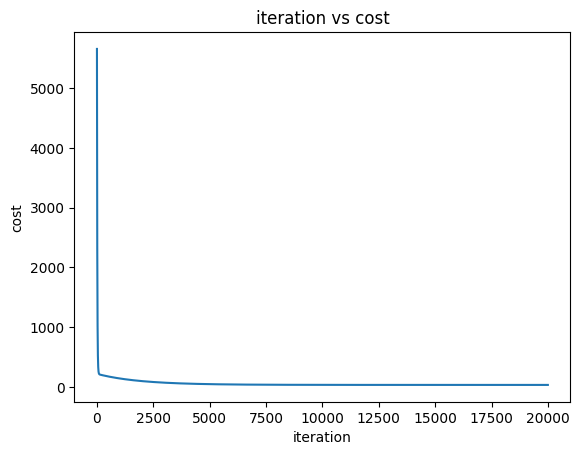

In [7]:
# 畫圖
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(0, 20000), c_hist)
plt.title("iteration vs cost")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()

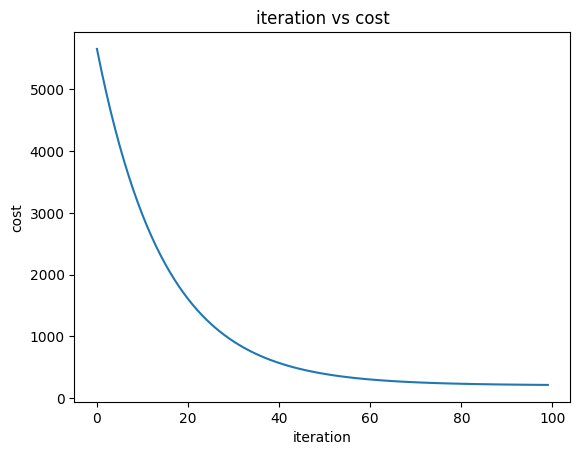

In [8]:
# 畫圖
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(0, 100), c_hist[:100]) # 前100 筆資料
plt.title("iteration vs cost")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()

In [9]:
print(f"最終: w={w_final:.2f}, b={b_final:.2f}")

最終: w=9.14, b=27.89


In [10]:
print(f"年資3.5 年，預測薪水: NT${w_final*3.5+b_final:.1f}k ")
print(f"年資5.9 年，預測薪水: NT${w_final*5.9+b_final:.1f}k ")

年資3.5 年，預測薪水: NT$59.9k 
年資5.9 年，預測薪水: NT$81.8k 


In [11]:
# 安裝中文字體
!pip install wget
import wget
wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf")

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=eaf4fcce7a80b8d37b3c94e1b924d97ccf807c1f8e286596eb8edf4528414dd9
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


'ChineseFont.ttf'

In [12]:
ws = np.arange(-100, 101)
bs = np.arange(-100, 101)
costs = np.zeros((201, 201))

i = 0
for w in ws:
  j = 0
  for b in bs:
    cost = compute_cost(x, y, w, b)
    costs[i,j] = cost
    j = j+1
  i = i+1
costs

array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]])

32.6948484848485
w is = [109] 
b is = [129]
當 w = [9] 且 b = [29] 時，有最小cost:[32.69484848]


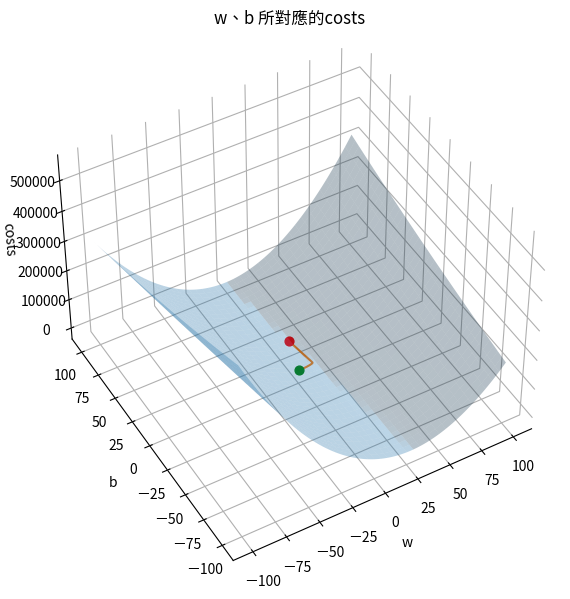

In [19]:
# 畫3D 圖
import matplotlib as mpl
from matplotlib.font_manager import fontManager
fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")
plt.figure(figsize=(7, 7))
# 3D繪圖套件
ax = plt.axes(projection="3d")
# 圖形旋轉: NAME.view_init(上下, 左右)
ax.view_init(45, -120)
# 顏色
ax.xaxis.set_pane_color((1,1,1))
ax.yaxis.set_pane_color((1,1,1))
ax.zaxis.set_pane_color((1,1,1))
# 畫圖 3D -> 2D
b_grid, w_grid = np.meshgrid(bs, ws) # 二維網格
ax.plot_surface(w_grid, b_grid, costs, alpha=0.3)
#ax.plot_surface(w_grid, b_grid, costs, cmap="Spectral_r", alpha=0.7)
# cmap: 顏色、alpha: 不透明度
#ax.plot_wireframe(w_grid, b_grid, costs, color="black", alpha=0.1) # 邊框顏色
ax.set_title("w、b 所對應的costs ")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("costs")
# 找出最低點
print(np.min(costs))
# 最低點w跟b
w_index, b_index = np.where(costs==np.min(costs))
print("w is =", w_index, "\nb is =", b_index)
print("當 w =", ws[w_index], "且 b =", bs[b_index], f"時，有最小cost:{costs[w_index, b_index]}")
# 畫點
ax.scatter(ws[w_index], bs[b_index], costs[w_index, b_index], color="red", s=40)
ax.scatter(w_hist[0], b_hist[0], c_hist[0], color="green", s=40)
# 畫線
ax.plot(w_hist, b_hist, c_hist)
# 秀圖
plt.show()

In [23]:
# 更改初始點位置至:(w, b)=(-100, -100)
w_init = -100
b_init = -100
learning_rate = 1.0e-3
iter_times=20000
#把函式當參數傳入: cost_function -> compute_cost, gradient_function -> compute_gradient, print_iter 已經設定好1000 故無須再設定
w_final, b_final, w_hist, b_hist, c_hist = gradient_descent(x, y, w_init, b_init, learning_rate, compute_cost, compute_gradient, iter_times)

Iteration     0 : Cost:5.08e+05, w:-9.58e+01, b:-9.93e+01, w_gradient:-4.20e+03, b_gradient:-6.61e+02
Iteration  1000 : Cost:1.94e+03, w: 2.17e+01, b:-5.56e+01, w_gradient: 3.35e+00, b_gradient:-2.23e+01
Iteration  2000 : Cost:1.15e+03, w: 1.87e+01, b:-3.60e+01, w_gradient: 2.57e+00, b_gradient:-1.71e+01
Iteration  3000 : Cost:6.88e+02, w: 1.65e+01, b:-2.10e+01, w_gradient: 1.96e+00, b_gradient:-1.31e+01
Iteration  4000 : Cost:4.17e+02, w: 1.48e+01, b:-9.51e+00, w_gradient: 1.50e+00, b_gradient:-1.00e+01
Iteration  5000 : Cost:2.58e+02, w: 1.34e+01, b:-7.18e-01, w_gradient: 1.15e+00, b_gradient:-7.67e+00
Iteration  6000 : Cost:1.64e+02, w: 1.24e+01, b: 6.01e+00, w_gradient: 8.82e-01, b_gradient:-5.87e+00
Iteration  7000 : Cost:1.10e+02, w: 1.17e+01, b: 1.12e+01, w_gradient: 6.75e-01, b_gradient:-4.50e+00
Iteration  8000 : Cost:7.78e+01, w: 1.11e+01, b: 1.51e+01, w_gradient: 5.17e-01, b_gradient:-3.44e+00
Iteration  9000 : Cost:5.90e+01, w: 1.06e+01, b: 1.81e+01, w_gradient: 3.96e-01, b

32.6948484848485
w is = [109] 
b is = [129]
當 w = [9] 且 b = [29] 時，有最小cost:[32.69484848]


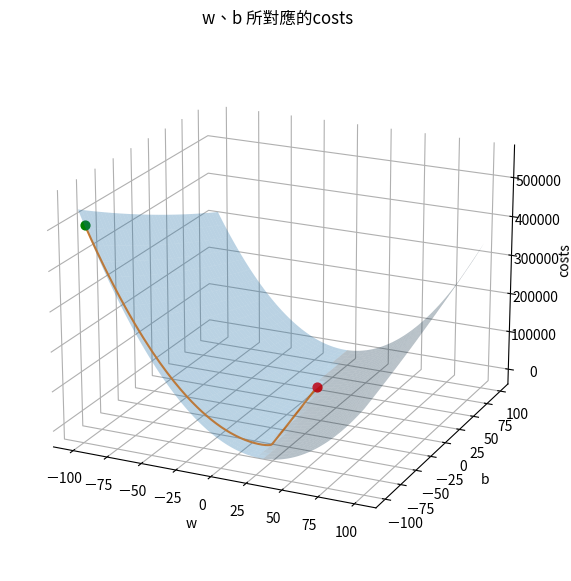

In [24]:
# 畫3D 圖2 (同上)
import matplotlib as mpl
from matplotlib.font_manager import fontManager
fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")
plt.figure(figsize=(7, 7))
# 3D繪圖套件
ax = plt.axes(projection="3d")
# 圖形旋轉: NAME.view_init(上下, 左右)
ax.view_init(20, -65)
# 顏色
ax.xaxis.set_pane_color((1,1,1))
ax.yaxis.set_pane_color((1,1,1))
ax.zaxis.set_pane_color((1,1,1))
# 畫圖 3D -> 2D
b_grid, w_grid = np.meshgrid(bs, ws) # 二維網格
ax.plot_surface(w_grid, b_grid, costs, alpha=0.3)
#ax.plot_surface(w_grid, b_grid, costs, cmap="Spectral_r", alpha=0.7)
# cmap: 顏色、alpha: 不透明度
#ax.plot_wireframe(w_grid, b_grid, costs, color="black", alpha=0.1) # 邊框顏色
ax.set_title("w、b 所對應的costs ")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("costs")
# 找出最低點
print(np.min(costs))
# 最低點w跟b
w_index, b_index = np.where(costs==np.min(costs))
print("w is =", w_index, "\nb is =", b_index)
print("當 w =", ws[w_index], "且 b =", bs[b_index], f"時，有最小cost:{costs[w_index, b_index]}")
# 畫點
ax.scatter(ws[w_index], bs[b_index], costs[w_index, b_index], color="red", s=40)
ax.scatter(w_hist[0], b_hist[0], c_hist[0], color="green", s=40)
# 畫線
ax.plot(w_hist, b_hist, c_hist)
# 秀圖
plt.show()